In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style='white', context='poster')
import umap

In [2]:
cmap1 = sns.color_palette("husl", 8, as_cmap=True)

TypeError: color_palette() got an unexpected keyword argument 'as_cmap'

In [4]:
df = pd.read_csv('../data/full_labels_df.csv', error_bad_lines=False)
loaded = np.load('../data/full_image_arr.npz')

In [5]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
3,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
4,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt


In [6]:
bw_img = loaded['b']

In [7]:
bw_img = bw_img/255

In [8]:
column_title = {'masterCategory': 'Master Categories', 'subCategory': 'Sub-Categories', 'articleType':'Article Types', 'season':'Season', 'gender': 'Gender', 'baseColour':'Base Color'}

In [9]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(bw_img)

/Users/Kelly/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 36 separate connected components using meta-embedding (experimental)
  n_components
/Users/Kelly/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [137]:
np.save('umap.npy', embedding)

In [265]:
sns.set_palette("pastel")

In [278]:
def plot_UMAP(embedding, column, font=14, cm='plasma'):
    #cmap = sns.choose_colorbrewer_palette("husl", 8, as_cmap=True)
    classes = list(df[column].value_counts().index)
    labels = df[column].astype('category').cat.codes
    n_classes = len(classes)
    fig, ax = plt.subplots(1, figsize=(18, 14))
    plt.scatter(*embedding.T, s=0.3, c=labels,cmap=cm, alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries=np.arange(n_classes+1)-0.5)
    cbar.set_ticks(np.arange(n_classes))
    cbar.ax.set_yticklabels(classes, fontsize=font)
    plt.title(f'Inventory Images with UMAP Dimension Reduction \n Color Coded by {column_title[column]}');

In [269]:
this = sns.choose_cubehelix_palette(as_cmap=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

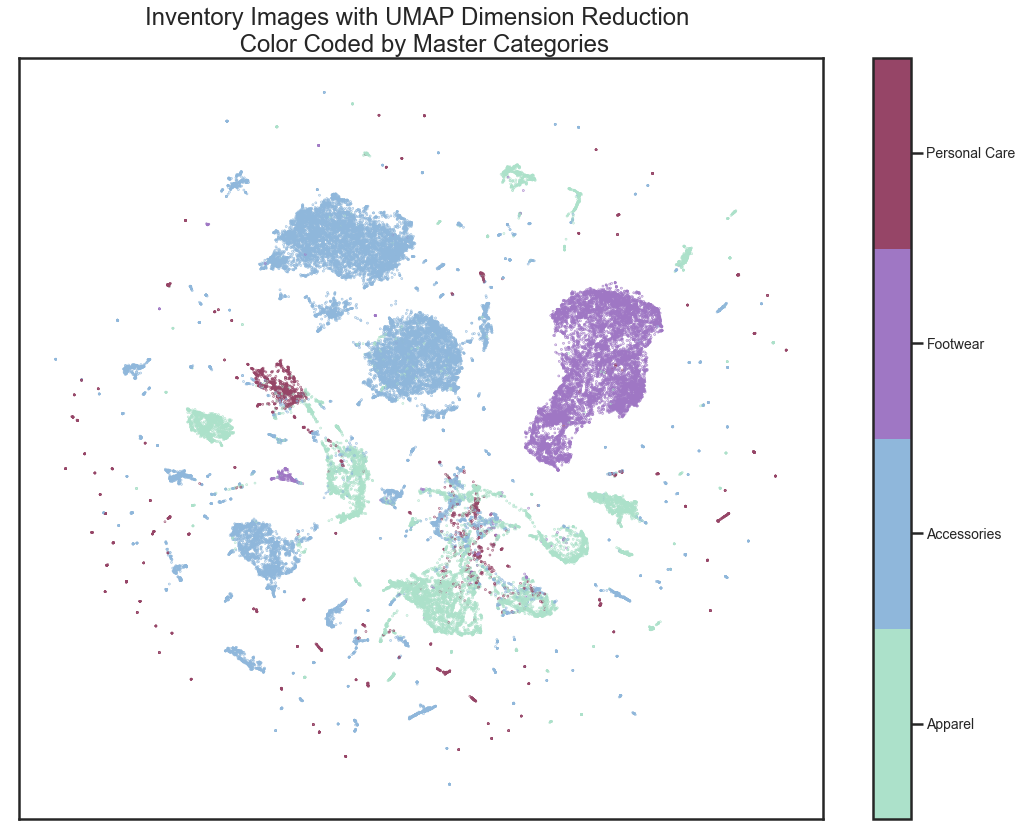

In [279]:
plot_UMAP(embedding, 'masterCategory', cm = this)

In [282]:
cb1 = sns.choose_colorbrewer_palette('divergent',as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

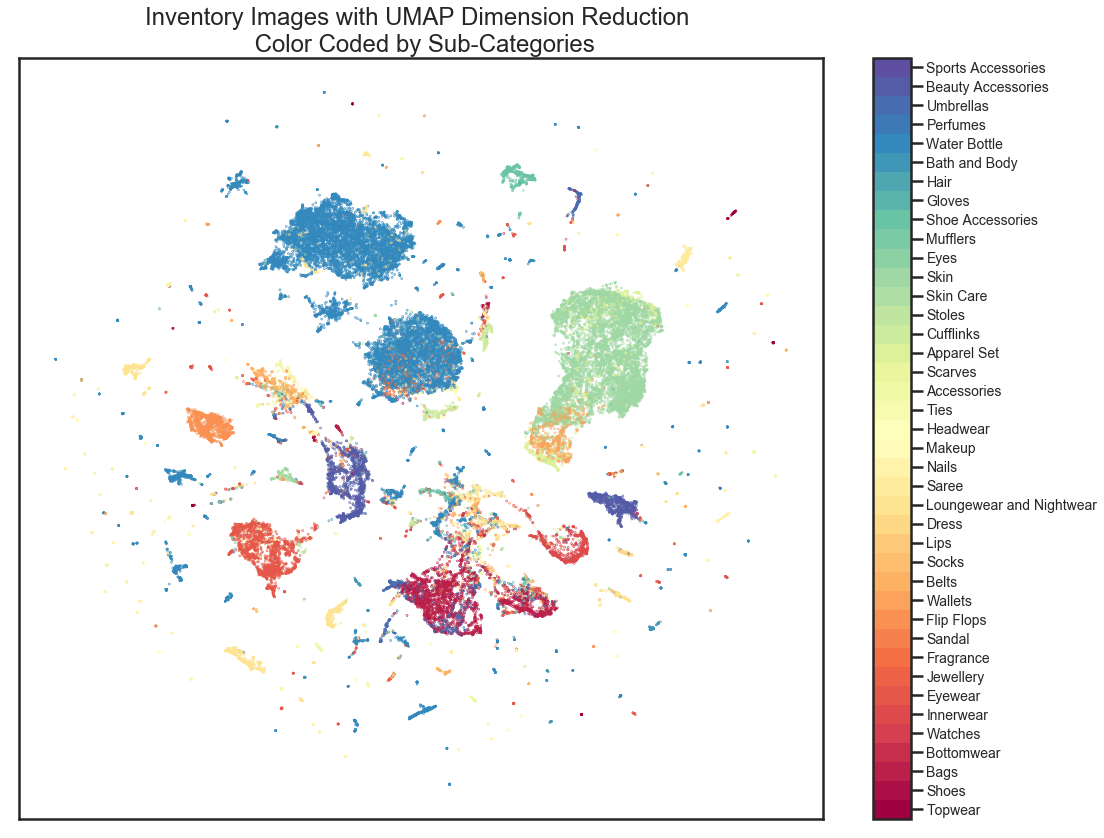

In [284]:
plot_UMAP(embedding, 'subCategory', cm=cb1)

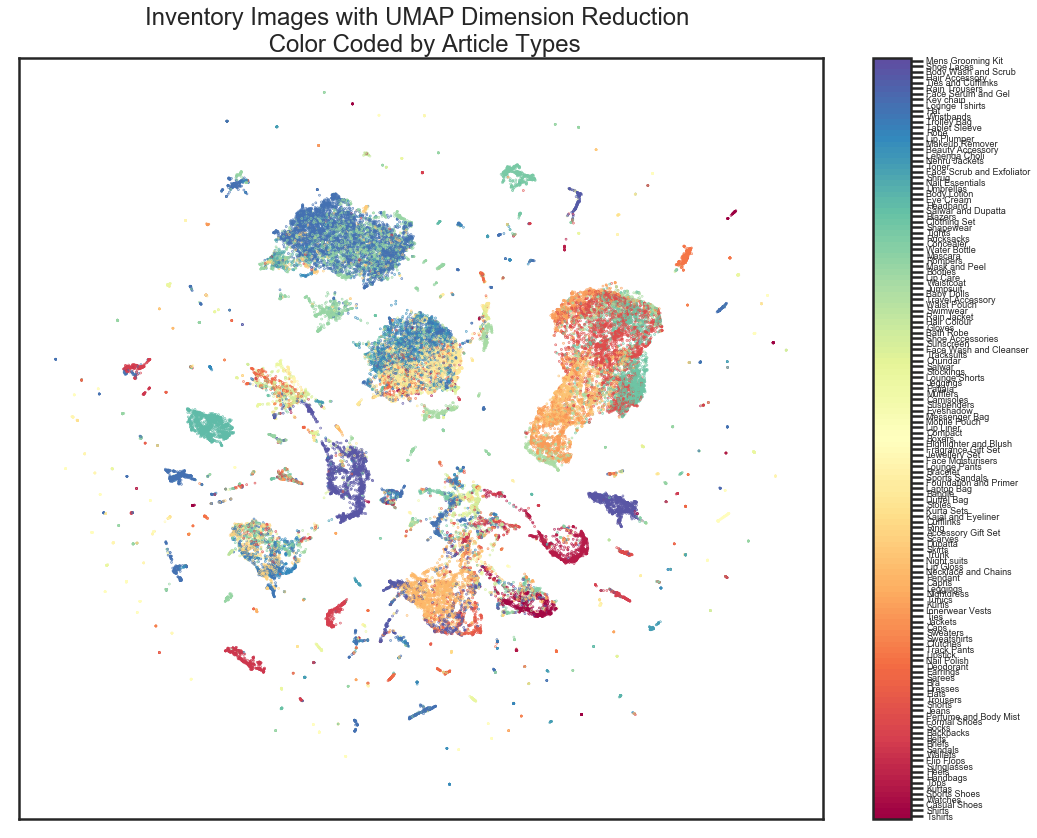

In [126]:
plot_UMAP(embedding, 'articleType', font=9)

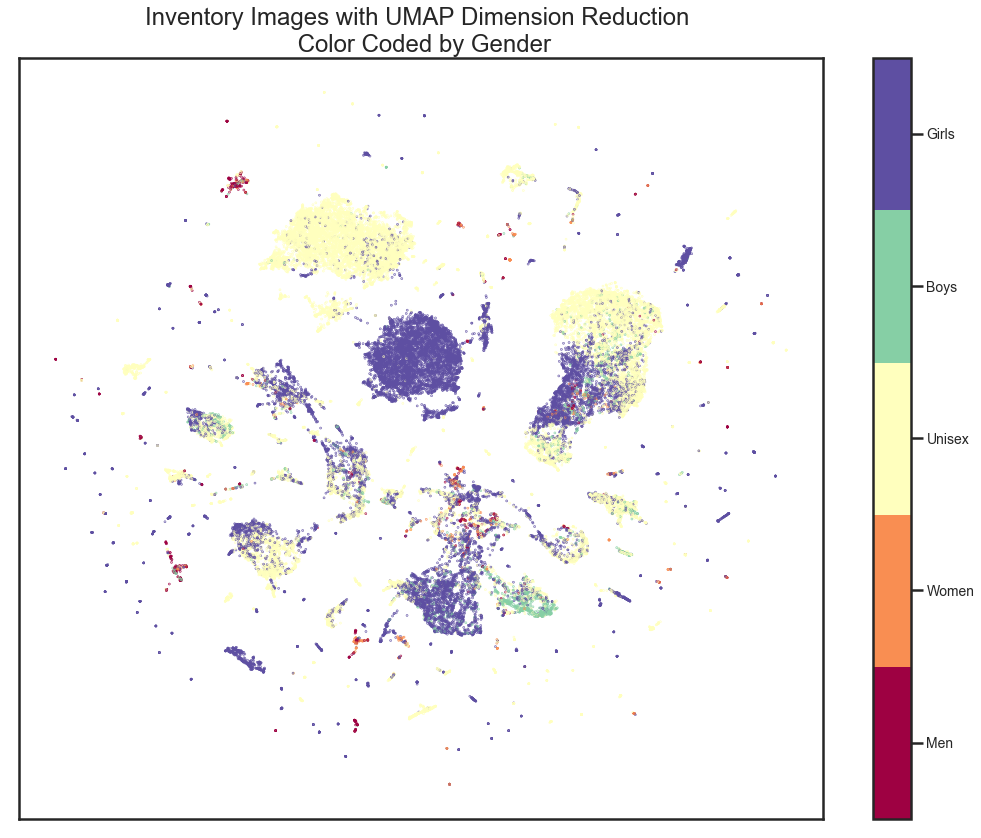

In [127]:
plot_UMAP(embedding, 'gender')

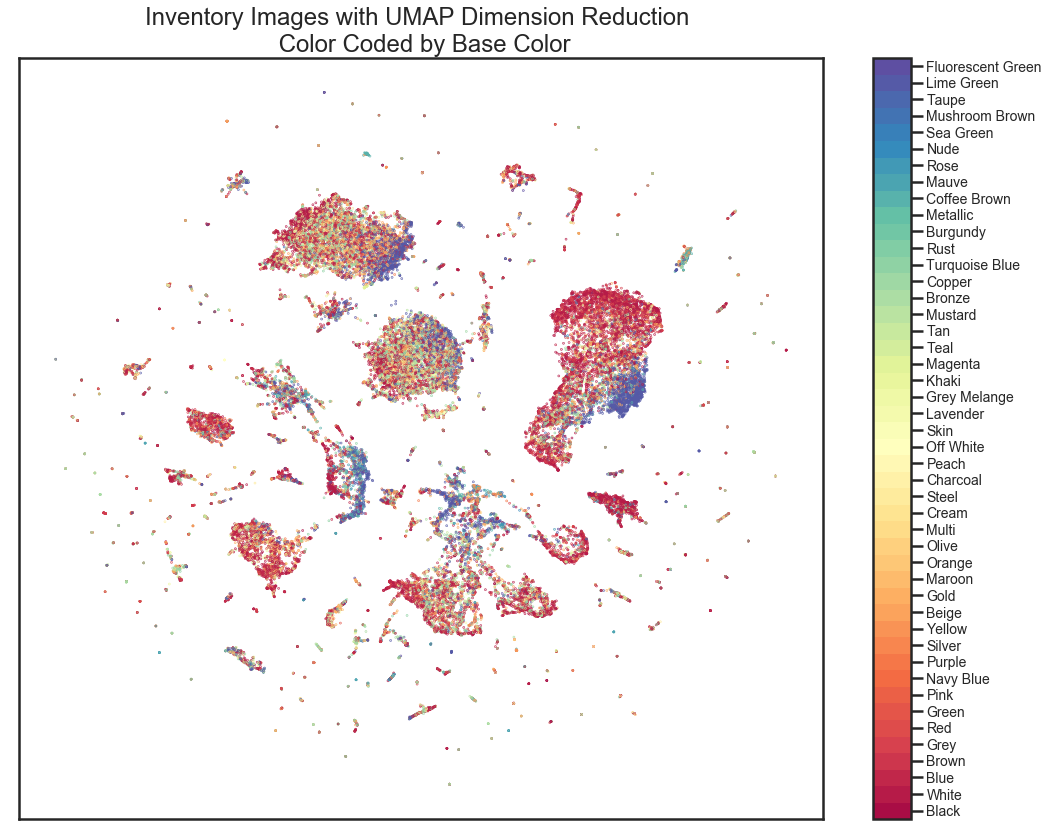

In [130]:
plot_UMAP(embedding, 'baseColour')

In [313]:
def plot_UMAP_with_groups(embedding, column, font=14, group=None, cm='plasma', emb_mode='UMAP'):
    classes = list(df[column].value_counts().index)
    labels = df[column].astype('category').cat.codes
    n_classes = len(classes)
    if group != None:
        d1 = {k:v for v, k in enumerate(classes)}
        #print(d1)
        sub_df = df[df['masterCategory']==group][column]
        #print(sub_df)
        sub_list = list(sub_df.value_counts().index)
        #print(sub_list)
        #sub_list.append(f'Not {group}')
        classes = sub_list
        n_subs = len(sub_list)
        #print(classes)
        d2 = {k:v for v, k in enumerate(classes)}
        for k in d1.keys():
            if k not in sub_list:
                d2[k]= n_subs
        n_classes = len(classes)
        d3 = {k: v for k, v in zip(d1.values(),d2.values())}
        labels = labels.apply(lambda x: d3[x])
        labels1 = labels[labels!=n_subs]
        lab1_idx = labels[labels!=n_subs].index
        labels2 = labels[labels==n_subs]
        lab2_idx = labels[labels==n_subs].index
        #print(labels1)
    fig, ax = plt.subplots(1, figsize=(18, 14))
    emb1 = embedding[lab1_idx]
    emb2 = embedding[lab2_idx]
    plt.scatter(*emb2.T, s=.3, color='#D3D3D3', alpha=.4)
    plt.scatter(*emb1.T, s=0.3, c=labels1, cmap=cm, alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries=np.arange(n_classes+1)-0.5)
    cbar.set_ticks(np.arange(n_classes))
    cbar.ax.set_yticklabels(classes, fontsize=font)
    plt.suptitle(f'Inventory Images with {emb_mode} Dimension Reduction', fontsize=15, y=.94, x=.44)
    plt.title(f'{group} Color Coded by {column_title[column]}', fontsize=22, y=1.01);

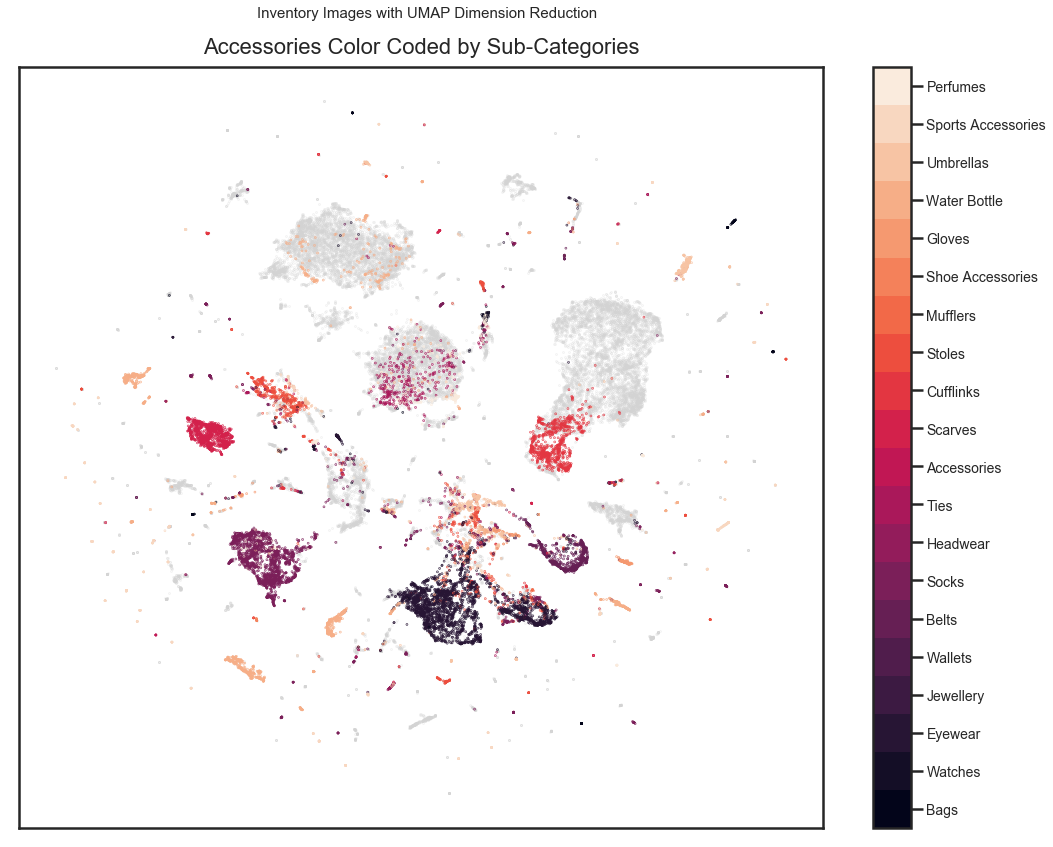

In [315]:
plot_UMAP_with_groups(embedding, column='subCategory', group='Accessories', cm='plasma')

In [316]:
cats = sns.choose_colorbrewer_palette('q')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

In [317]:
sns.set_palette(cats)

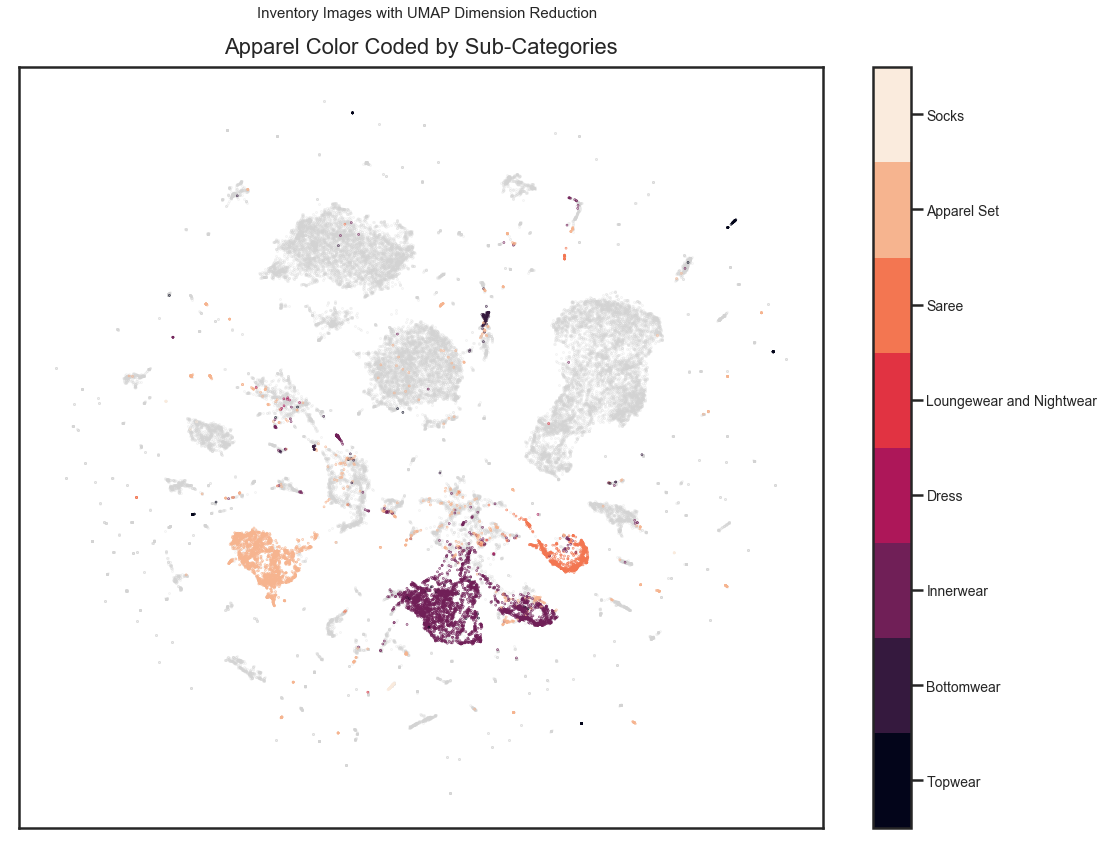

In [318]:
plot_UMAP_with_groups(embedding, column='subCategory', group='Apparel')